In [2]:
import pandas as pd

# Cargar los datasets
df_single = pd.read_csv("C:/Users/34629/TFG/single_label_dataset_without_H.csv", sep=';')
df_augmented = pd.read_csv("C:/Users/34629/TFG/augmented_TT_dataset.csv", sep=';')

# Verifica el nombre exacto de la columna de clases
print("Columnas en el primer dataset:", df_single.columns)
print("Columnas en el segundo dataset:", df_augmented.columns)

# Filtrar filas que NO pertenezcan a la clase 'O'
df_single_filtered = df_single[df_single['O'] != 1]
df_augmented_filtered = df_augmented[df_augmented['O'] != 1]

# Guardar los datasets filtrados
df_single_filtered.to_csv("C:/Users/34629/TFG/single_label_dataset_without_H_no_O.csv", index=False)
df_augmented_filtered.to_csv("C:/Users/34629/TFG/augmented_TT_dataset_no_O.csv", index=False)

print("Filtrado completado. Archivos guardados sin la clase 'O'.")


Columnas en el primer dataset: Index(['Patient_Age', 'Patient_Sex', 'ID', 'Eye_Side', 'Image_Path',
       'Diagnostic_Keywords', 'N', 'D', 'G', 'C', 'A', 'M', 'O'],
      dtype='object')
Columnas en el segundo dataset: Index(['Patient_Age', 'Patient_Sex', 'ID', 'Eye_Side', 'Image_Path',
       'Diagnostic_Keywords', 'N', 'D', 'G', 'C', 'A', 'M', 'O'],
      dtype='object')
Filtrado completado. Archivos guardados sin la clase 'O'.


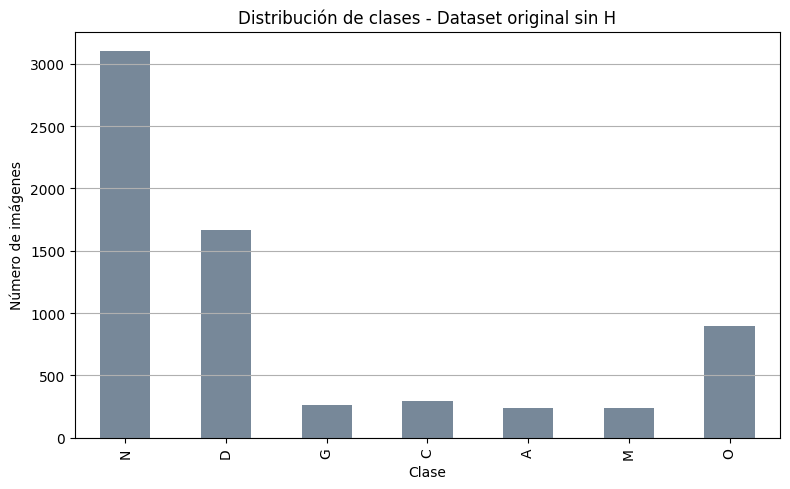

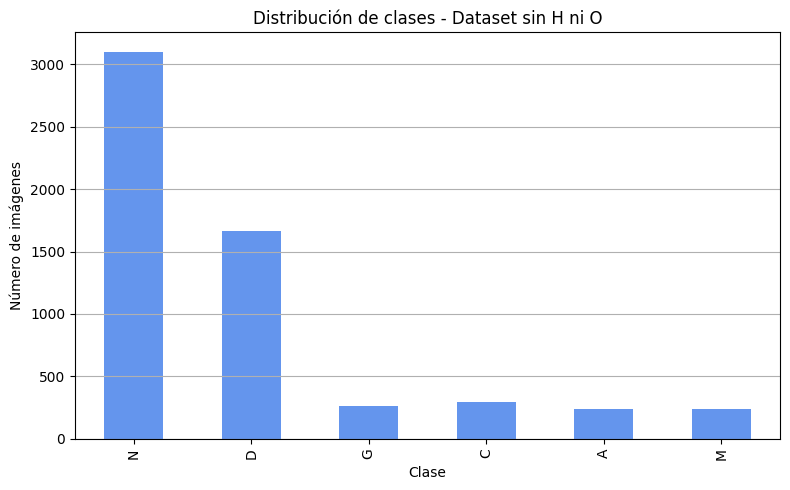

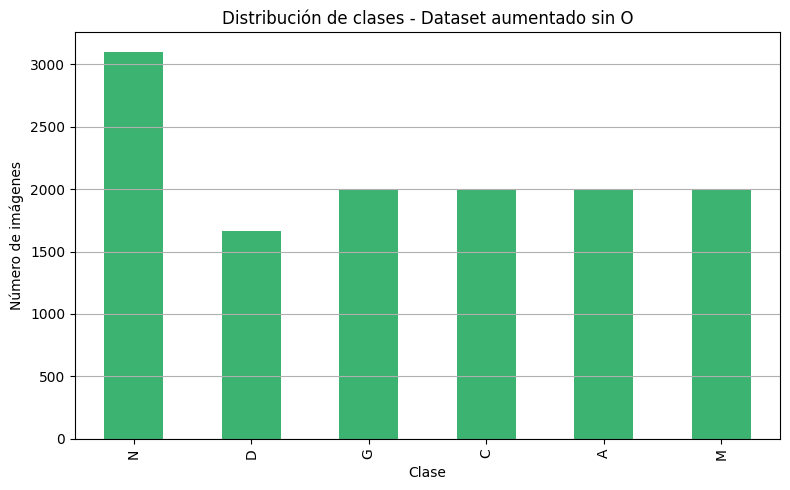

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los tres datasets
df_original = pd.read_csv("C:/Users/34629/TFG/single_label_dataset_without_H.csv", sep=';')
df_single_filtered = pd.read_csv("C:/Users/34629/TFG/single_label_dataset_without_H_no_O.csv")
df_augmented_filtered = pd.read_csv("C:/Users/34629/TFG/augmented_TT_dataset_no_O.csv")

# Columnas de clases
all_classes = ['N', 'D', 'G', 'C', 'A', 'M', 'O']
filtered_classes = ['N', 'D', 'G', 'C', 'A', 'M']

# Contar ocurrencias por clase
counts_original = df_original[all_classes].sum()
counts_single_filtered = df_single_filtered[filtered_classes].sum()
counts_augmented_filtered = df_augmented_filtered[filtered_classes].sum()

# Gráfico 1: Dataset original
plt.figure(figsize=(8, 5))
counts_original.plot(kind='bar', color='lightslategray')
plt.title('Distribución de clases - Dataset original sin H')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico 2: Dataset sin H ni O
plt.figure(figsize=(8, 5))
counts_single_filtered.plot(kind='bar', color='cornflowerblue')
plt.title('Distribución de clases - Dataset sin H ni O')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico 3: Dataset aumentado sin O
plt.figure(figsize=(8, 5))
counts_augmented_filtered.plot(kind='bar', color='mediumseagreen')
plt.title('Distribución de clases - Dataset aumentado sin O')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


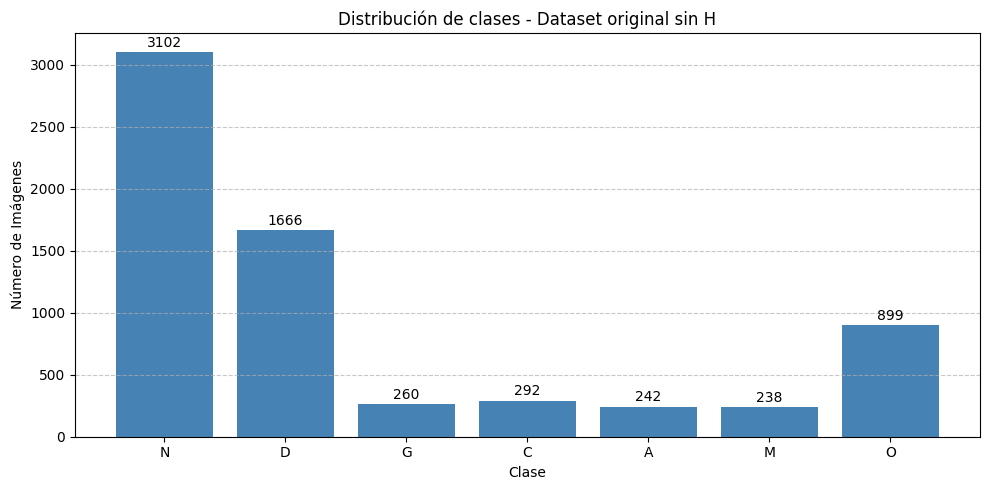

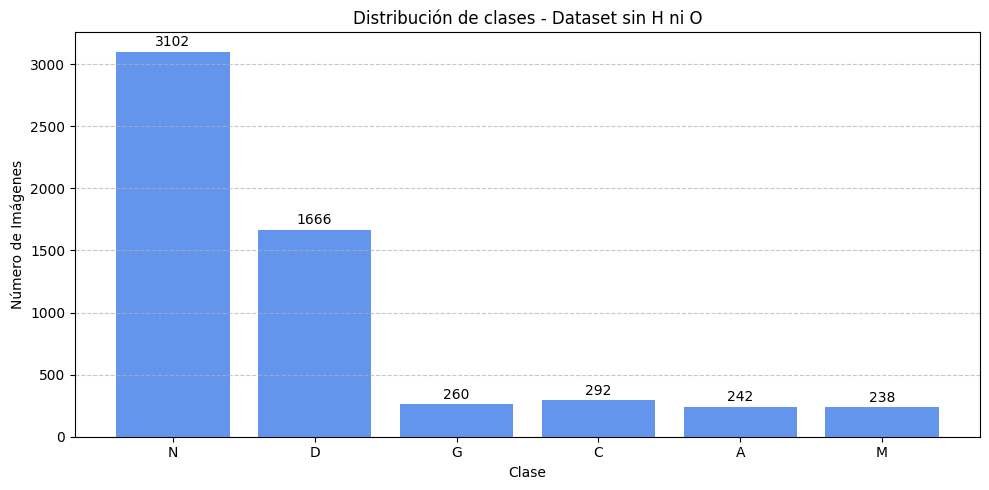

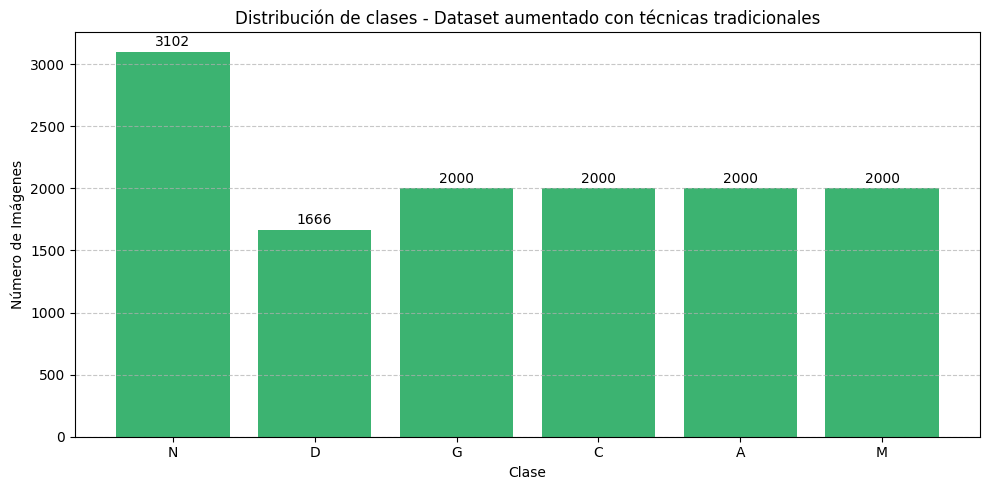

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datasets
df_original = pd.read_csv("C:/Users/34629/TFG/single_label_dataset_without_H.csv", sep=';')
df_single_filtered = pd.read_csv("C:/Users/34629/TFG/single_label_dataset_without_H_no_O.csv")
df_augmented_filtered = pd.read_csv("C:/Users/34629/TFG/augmented_TT_dataset_no_O.csv")

# Columnas de clases
all_classes = ['N', 'D', 'G', 'C', 'A', 'M', 'O']
filtered_classes = ['N', 'D', 'G', 'C', 'A', 'M']

# Contar ocurrencias por clase
counts_original = df_original[all_classes].sum()
counts_single_filtered = df_single_filtered[filtered_classes].sum()
counts_augmented_filtered = df_augmented_filtered[filtered_classes].sum()

# Función para generar el gráfico con etiquetas sobre cada barra
def plot_distribution(counts, title, color):
    plt.figure(figsize=(10, 5))
    bars = plt.bar(counts.index, counts.values, color=color)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 20, f'{int(height)}',
                 ha='center', va='bottom', fontsize=10)
    plt.title(title, fontsize=12)
    plt.xlabel('Clase')
    plt.ylabel('Número de Imágenes')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Dibujar los gráficos
plot_distribution(counts_original, 'Distribución de clases - Dataset original sin H', 'steelblue')
plot_distribution(counts_single_filtered, 'Distribución de clases - Dataset sin H ni O', 'cornflowerblue')
plot_distribution(counts_augmented_filtered, 'Distribución de clases - Dataset aumentado con técnicas tradicionales', 'mediumseagreen')


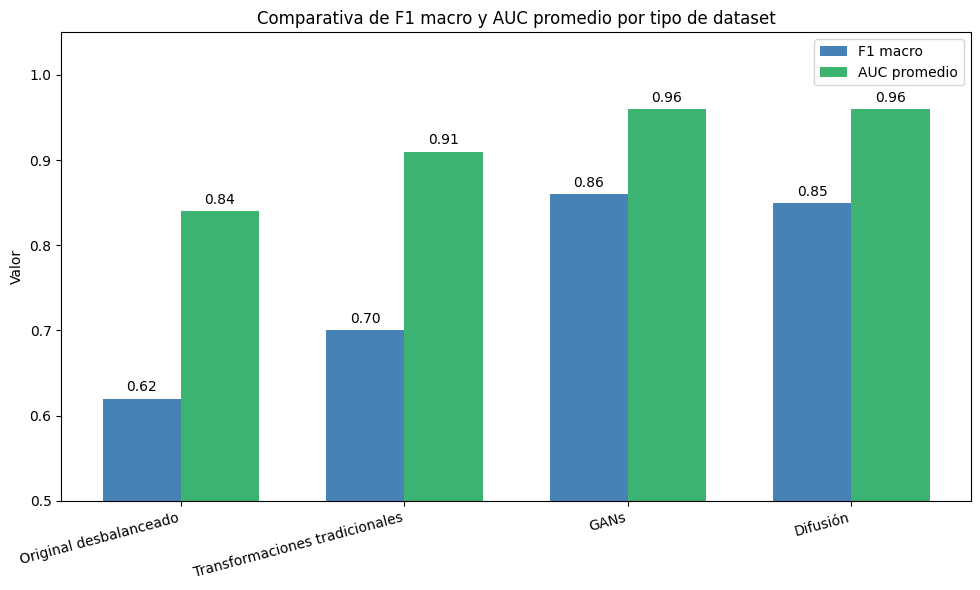

In [2]:
### Comparación entre modelos de datasets ###

import matplotlib.pyplot as plt
import numpy as np

# Nombres de los métodos
datasets = [
    'Original desbalanceado',
    'Transformaciones tradicionales',
    'GANs',
    'Difusión'
]

# F1 macro por dataset
f1_scores = [0.62, 0.70, 0.86, 0.85]

# AUC promedio estimado por dataset
auc_scores = [0.84, 0.91, 0.96, 0.96]

# Posiciones de las barras
x = np.arange(len(datasets))
width = 0.35  # Ancho de cada barra

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, f1_scores, width, label='F1 macro', color='steelblue')
bars2 = ax.bar(x + width/2, auc_scores, width, label='AUC promedio', color='mediumseagreen')

# Etiquetas y título
ax.set_ylabel('Valor')
ax.set_title('Comparativa de F1 macro y AUC promedio por tipo de dataset')
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=15, ha='right')
ax.set_ylim(0.5, 1.05)
ax.legend()

# Mostrar los valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # separación en píxeles
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


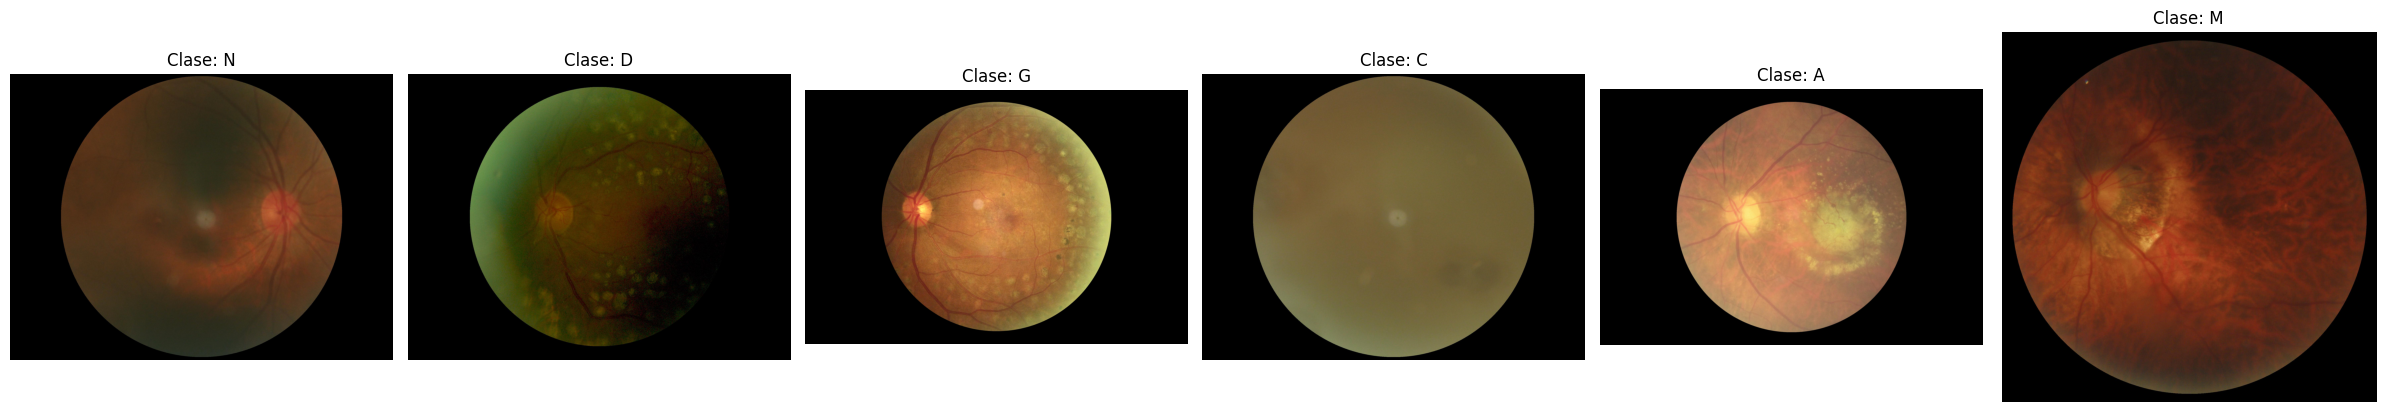

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Ruta al CSV
csv_path = "C:/Users/34629/TFG/single_label_dataset_without_H_no_O.csv"
df = pd.read_csv(csv_path)

# Lista de clases
clases = ['N', 'D', 'G', 'C', 'A', 'M', 'O']

# Crear figura dinámica según las clases disponibles
imagenes = []

for clase in clases:
    subset = df[df[clase] == 1]
    if not subset.empty:
        fila = subset.iloc[0]
        imagen = Image.open(fila['Image_Path'])
        imagenes.append((clase, imagen))

# Mostrar las imágenes disponibles
fig, axs = plt.subplots(1, len(imagenes), figsize=(4 * len(imagenes), 4))

if len(imagenes) == 1:
    axs = [axs]  # manejar el caso de una sola imagen

for ax, (clase, imagen) in zip(axs, imagenes):
    ax.imshow(imagen)
    ax.set_title(f"Clase: {clase}")
    ax.axis("off")

plt.tight_layout()
plt.show()


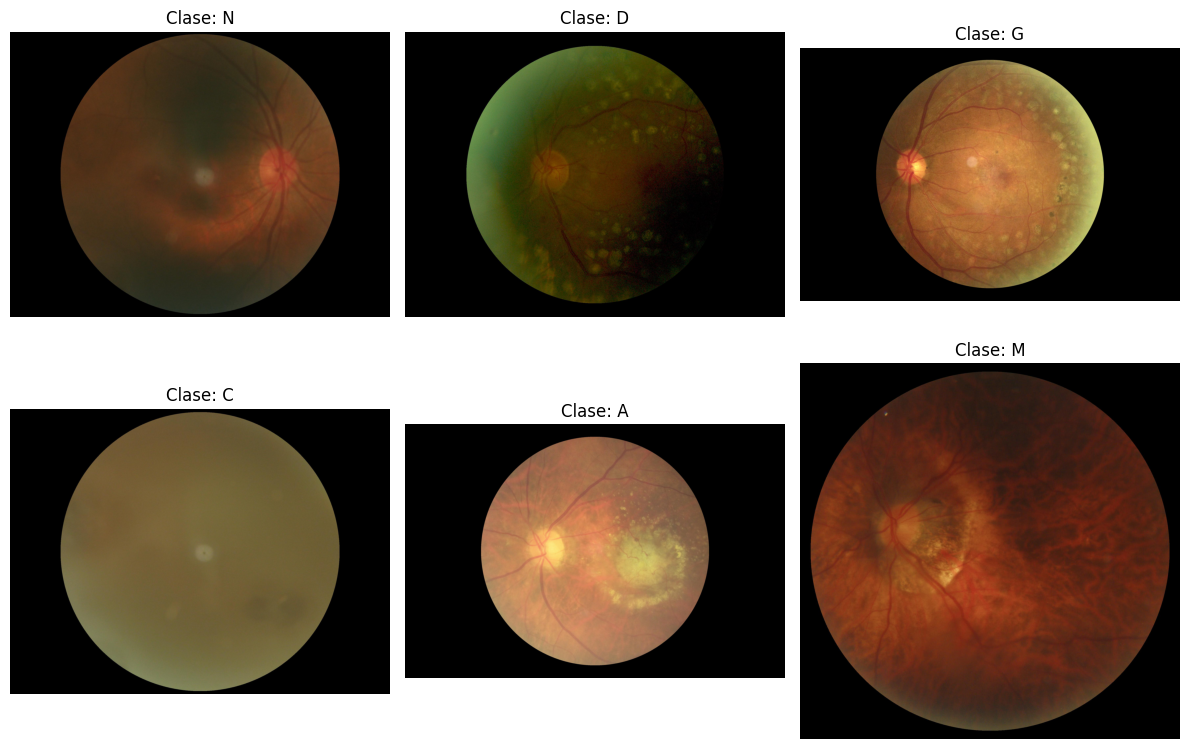

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Ruta al CSV
csv_path = "C:/Users/34629/TFG/single_label_dataset_without_H_no_O.csv"
df = pd.read_csv(csv_path)

# Lista de clases
clases = ['N', 'D', 'G', 'C', 'A', 'M', 'O']

# Obtener una imagen por clase
imagenes = []
for clase in clases:
    subset = df[df[clase] == 1]
    if not subset.empty:
        fila = subset.iloc[0]
        imagen = Image.open(fila['Image_Path'])
        imagenes.append((clase, imagen))

# Configurar número de columnas por fila
cols = 3
n = len(imagenes)
rows = (n + cols - 1) // cols  # redondeo hacia arriba

fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

# Aplanar axs en una lista para iterar fácilmente
axs = axs.flatten()

# Mostrar imágenes
for i, (clase, imagen) in enumerate(imagenes):
    axs[i].imshow(imagen)
    axs[i].set_title(f"Clase: {clase}")
    axs[i].axis("off")

# Ocultar ejes vacíos si hay menos de 6-9 imágenes
for j in range(i + 1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()
